# Import Libraries
relevant libaries for preparing data and visualisation

In [74]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("clean")

# Import Machine Learning and Technical Analysis libraries

In [75]:
from talib import abstract
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Data download

In [76]:
raw = pdr.get_data_yahoo('GOOG', start=datetime(2015,1,1), end=datetime.today())
data = pd.DataFrame(raw['Close'])
data['Returns'] = np.log(data/data.shift(1))
data.drop(columns=['Close'], inplace=True)
data.head()
#raw.head()

,Returns
Date,
2015-01-02,NaN
2015-01-05,-0.021066
2015-01-06,-0.023450
2015-01-07,-0.001715
2015-01-08,0.003148


# List of all technical analysis indicators in TaLib

In [77]:
import inspect 
f = abstract
dir1 = dir(f)
public_method_names = [method for method in dir1 if method.startswith('CDL')]
print(public_method_names)

['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI', 'CDLENGULFING', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLGAPSIDESIDEWHITE', 'CDLGRAVESTONEDOJI', 'CDLHAMMER', 'CDLHANGINGMAN', 'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLHIKKAKEMOD', 'CDLHOMINGPIGEON', 'CDLIDENTICAL3CROWS', 'CDLINNECK', 'CDLINVERTEDHAMMER', 'CDLKICKING', 'CDLKICKINGBYLENGTH', 'CDLLADDERBOTTOM', 'CDLLONGLEGGEDDOJI', 'CDLLONGLINE', 'CDLMARUBOZU', 'CDLMATCHINGLOW', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR', 'CDLONNECK', 'CDLPIERCING', 'CDLRICKSHAWMAN', 'CDLRISEFALL3METHODS', 'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE', 'CDLSPINNINGTOP', 'CDLSTALLEDPATTERN', 'CDLSTICKSANDWICH', 'CDLTAKURI', 'CDLTASUKIGAP', 'CDL

# Create Dataframe of technical indicators using raw data

In [78]:
cols = []
closes, highs, lows, opens, volumes = raw['Close'], raw['High'], raw['Low'], raw['Open'], raw['Volume']
inputs = {'open': np.array(opens), 'high': np.array(highs), 'low': np.array(lows), 'close': np.array(closes), 'volume': np.array(volumes)}

for method in public_method_names:
  col = getattr(f, method)(inputs)
  data[method] = col
  cols.append(col)
  
data.dropna(inplace=True)
data


,Returns,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.021066,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-06,-0.023450,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-07,-0.001715,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-08,0.003148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-09,-0.013035,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,0.006337,0,0,0,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-08-31,-0.000052,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-09-01,0.002609,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split dataframe into train and test

In [79]:
X = pd.DataFrame(data.drop("Returns", axis=1)).copy()
y = pd.DataFrame(data['Returns']).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Machine Learning Model

In [80]:
lm = linear_model.LogisticRegression(C=1e12)

In [81]:
lm.fit(X_train, np.sign(y_train))

C:\Users\raamt\anaconda3\envs\Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\raamt\anaconda3\envs\Env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000000000000.0)

In [82]:
lm_pred = lm.predict(X_train)

In [83]:
y_train_new = pd.DataFrame(y_train).copy()
y_train_new['lm_pos'] = lm_pred
y_train_new = y_train_new.sort_values(by="Date")
y_train_new

,Returns,lm_pos
Date,,
2015-01-05,-0.021066,-1.0
2015-01-06,-0.023450,-1.0
2015-01-07,-0.001715,-1.0
2015-01-08,0.003148,-1.0
2015-01-09,-0.013035,-1.0
...,...,...
2021-08-23,0.019050,-1.0
2021-08-25,0.003865,1.0
2021-08-30,0.006337,1.0


In [84]:
y_train_new['lm_Strat'] = (y_train_new['lm_pos'] * y_train_new['Returns'])
y_train_new

,Returns,lm_pos,lm_Strat
Date,,,
2015-01-05,-0.021066,-1.0,0.021066
2015-01-06,-0.023450,-1.0,0.023450
2015-01-07,-0.001715,-1.0,0.001715
2015-01-08,0.003148,-1.0,-0.003148
2015-01-09,-0.013035,-1.0,0.013035
...,...,...,...
2021-08-23,0.019050,-1.0,-0.019050
2021-08-25,0.003865,1.0,0.003865
2021-08-30,0.006337,1.0,0.006337


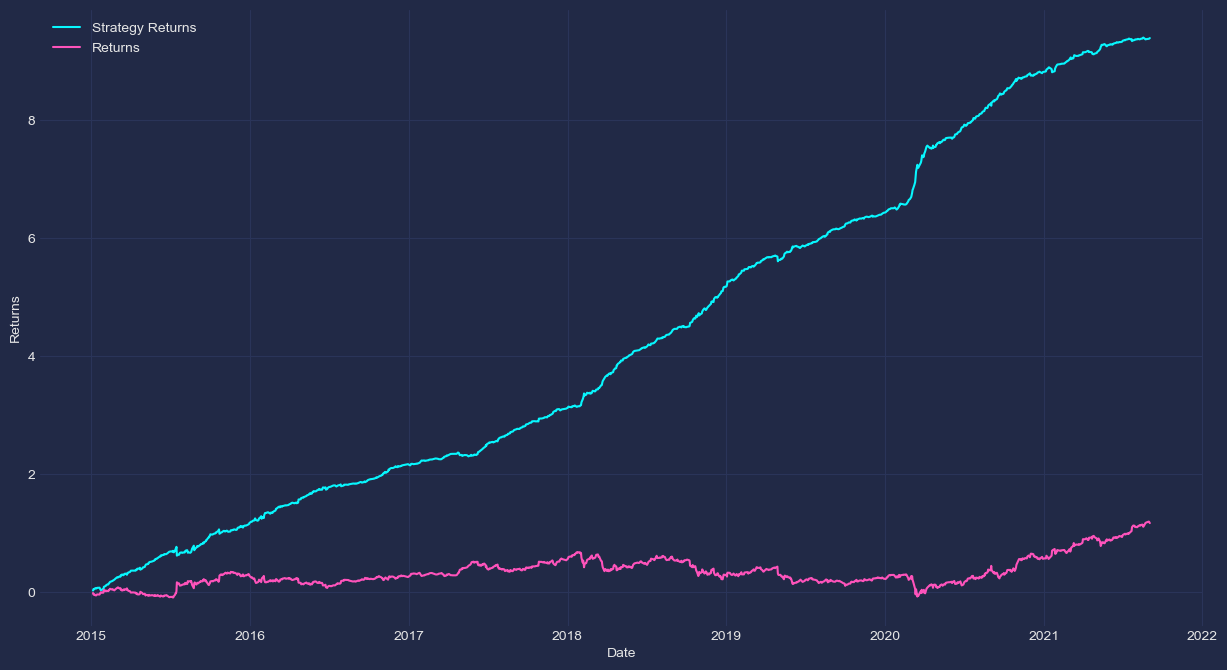

In [85]:
c = y_train_new['lm_Strat'].cumsum()
r = (y_train_new['Returns']+1).cumprod()-1

plt.figure(figsize=(15,8))
plt.plot(c, label='Strategy Returns')
plt.plot(r, label='Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()
plt.close()

# Accuracy Report

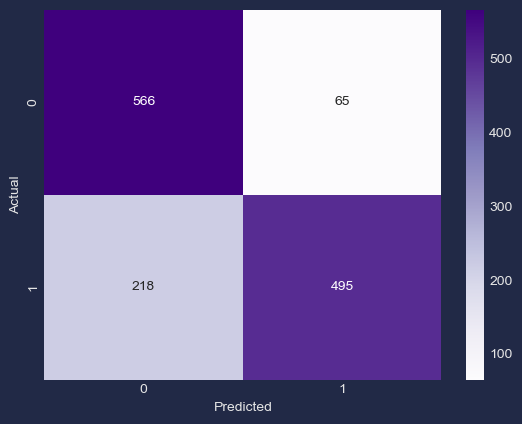

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

actual = np.sign(y_train)
predicted = lm_pred

cm = confusion_matrix(actual, predicted)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Purples', fmt="")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [87]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

        -1.0       0.72      0.90      0.80       631
         1.0       0.88      0.69      0.78       713

    accuracy                           0.79      1344
   macro avg       0.80      0.80      0.79      1344
weighted avg       0.81      0.79      0.79      1344

